In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import *

In [4]:
tems, pres, df_fit = import_data('Time_Series_Abril')

### Parámetros del ajuste para toda la serie temporal
Ajuste a función:
$$f(z) = a_3 + b_3(z − D) + a_2 e^{(− b_2(z − D) − c_2(z − D)^2)}$$

si $z > D$. En caso contrario: $f(z) = a_1$

Parámetros:
- `D1`: Profundidad de la capa de mezcla (m)
- `a1`: SST (ºC)
- `a2`: Salto entre termoclina estacional y permanente (ºC)
- `b3`: Pendiente de la termoclina permanente (ºC/m)
- `a3`: Temperatura base de la termoclina permanente (ºC)
- `b2`: Parámetro de decaimiento exponencial en la termoclina estacional (1/m)
- `c2`: Parámetro de decaimiento gaussiano en la termoclina estacional (1/m²)

Representación de la evolución de los parámetros de ajuste para toda la serie temporal de los termistores SBE56 en intervalos de 800 medidas (1 hora aprox):

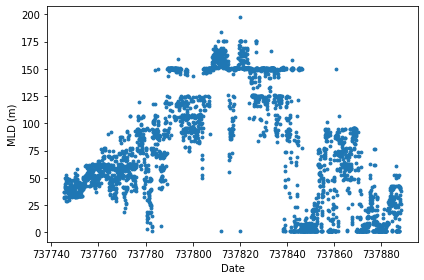

In [43]:
plot_fit_variable(df_fit, 'D1m', 800)

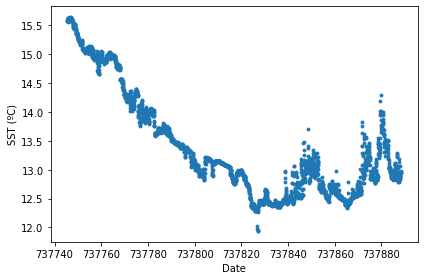

In [41]:
plot_fit_variable(df_fit, 'a1m', 800)

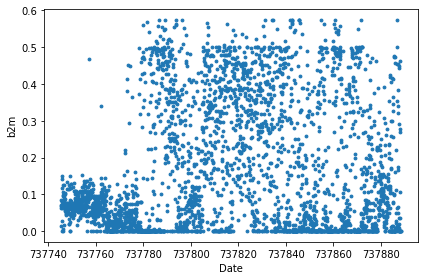

In [42]:
plot_fit_variable(df_fit, 'b2m', 800)

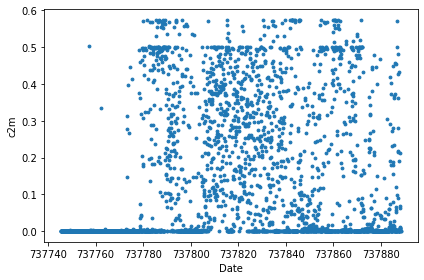

In [40]:
plot_fit_variable(df_fit, 'c2m', 800)

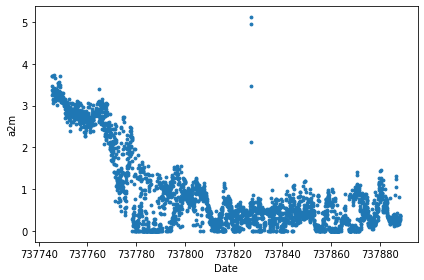

In [39]:
plot_fit_variable(df_fit, 'a2m', 800)

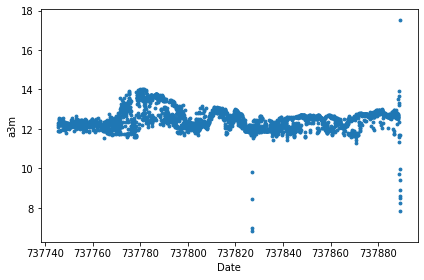

In [10]:
plot_fit_variable(df_fit, 'a3m', 800)

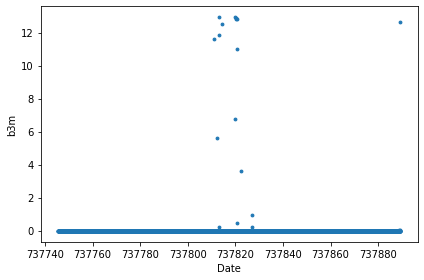

In [12]:
plot_fit_variable(df_fit, 'b3m', 800)

### Problemas encontrados ###

1. No todos los archivos de datos de los termistores SBE56 contien el mismo número de medidas. Para generar la serie temporal he truncado todos los datos de los termistores que tenían un exceso de medidas para tomar el mismo número de medidas que el termistor que menos tenía.

2. No sé pasar el formato de fecha incluido en los datos a un formato del tipo año/mes/día/min/seg, por lo que para todo el análisis que he ido haciendo identifico cada perfil con el número de su posición en la serie.  

### Apreciaciones interesantes

La tendencia general de los parámetros D1, a1, y a2 parece buena. No he llegado a sacar los parámetros de estratificación $G_{0.05}$ y de forma. Por aquí escribo algunas cuestiones que me han llamado la atención del ajuste a la serie:

**Oscilaciones en los parámetros de ajuste para perfiles consecutivos**

Muchos ajustes a perfiles consecutivos muestran una gran disparidad entre sus parámetros (ver In [61]). Pequeñas oscilaciones de la temperatura en la zona de la termoclina estacional y permanente producen que el algoritmo converga a ajustes muy dispares. Podría solucionarse como comentaba César forzando lo valores de la termoclina permanente a ser acordes con los de los sondeos mensuales. Igual también jugar un poco más con los propios parámetros del algoritmo, pero no he de indagado mucho en él. También forzar de alguna manera una cierta similitud en los ajustes consecutivos, igual forzando los límites de los parámetros del ajuste así como los valores iniciales para el perfil n en función del los obtenidos para el ajuste n-1, aunque se perdería entonces la capacidad de poder paralelizar la computación, al menos de la forma en que está implementada ahora. No obstante se podría reducir el número de generaciones, pues los parámetros iniciales estarían ya próximos al mínimo.

**Perfiles en invierno**

Al solo tener 4 termistores por debajo de los 100 metros y los perfiles en invierno presentar una MLD de más de 100 metros, no se tienen suficientes datos para ajustar correctamente la forma de la termoclina estacional y permanente en esta época (ver In [5]). Otra vez, utilizar los valores de la termoclina permanente obtenidos de los muestreos mensuales podría ser la solución.

**Útimos perfiles de la serie**

Llega un punto en el que los útlimos perfiles se disparan y los termistores cominzan a dar medidas muy dispares entre si. En el repositorio de GitHub, en la carpeta results, hay una animación mostrando este comportamiento. También en las representaciones de la línea 63 lo he intentado plasmar. Puede ser algún malfuncionamiento de los aparatos o algun problema con en la cadena, pero es muy extraño. También puede ser algun error a la hora de generar la serie temporal, debido al truncamiento de los datos de algunos termistores. No lo he mirado más a fondo.

**Perfiles a mitad de serie**

En los parámetros del ajuste también ocurre algo extraño hacia la mitad de la serie. No he indagado más.

D1: 56.35, a1: 14.57, b3: -2.38E-03, b2:0.00E+00, c2: 4.66E-04
D1: 91.21, a1: 14.51, b3: -7.18E-03, b2:1.05E-01, c2: 2.62E-18
D1: 92.62, a1: 14.50, b3: -7.61E-03, b2:1.69E-01, c2: 1.59E-16
D1: 92.57, a1: 14.50, b3: -7.58E-03, b2:1.67E-01, c2: 0.00E+00


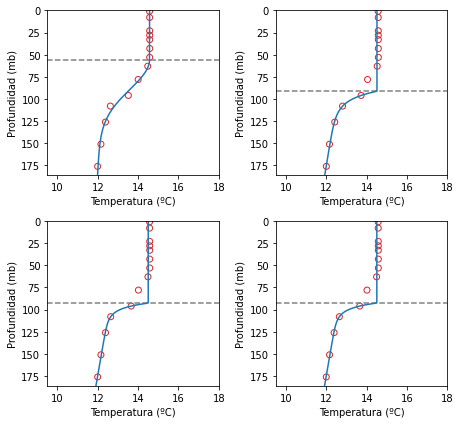

In [61]:
plot_multiple_profiles(df_fit, tems, pres, [400000, 400001, 400002, 400003]) # perfiles consec. con distinto ajuste

D1: 150.59, a1: 12.96, b3: 0.00E+00, b2:1.24E-01, c2: 3.26E-01
D1: 168.17, a1: 12.73, b3: -8.04E-06, b2:4.72E-01, c2: 3.07E-01
D1: 144.86, a1: 12.33, b3: -5.96E-03, b2:3.80E-01, c2: 2.96E-01
D1: 89.31, a1: 12.48, b3: -2.06E-03, b2:0.00E+00, c2: 9.82E-05


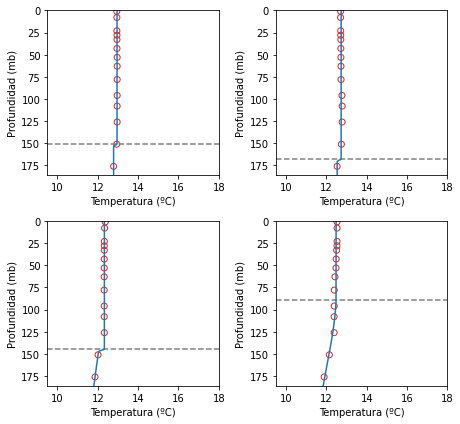

In [5]:
plot_multiple_profiles(df_fit, tems, pres, [1280000, 1340000, 1400000, 1600000]) # perfiles y ajustes en invierno

D1: 38.86, a1: 12.94, b3: -4.83E-03, b2:6.94E-02, c2: 8.50E-03
D1: 1.00, a1: 16.16, b3: -2.11E-03, b2:5.75E-01, c2: 5.75E-01
D1: 34.74, a1: 15.26, b3: -3.65E-19, b2:4.37E-01, c2: 5.27E-01
D1: 149.57, a1: 10.62, b3: -3.64E-04, b2:1.18E-01, c2: 1.80E-01


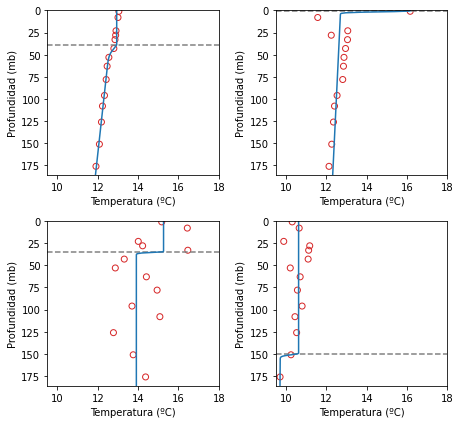

In [63]:
plot_multiple_profiles(df_fit, tems, pres, [2471000, 2472000, 2476000, 2480000]) # últimos perfiles anómalos